In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import feature_extraction
from sklearn.metrics.pairwise import cosine_similarity

plt.rcParams['figure.figsize'] = [15, 15]


In [2]:
df = pd.read_csv('data.csv', sep=';')
df.head()

,ID,Title,Description,Objectives,Solutions,Duration
0,d.4,Emotional Intelligence,<p>Emotional intelligence is the skill at perc...,<p>Here are the topics you will learn about by...,NaN,<p>2 hour 35 minutes</p>
1,d.5,Stress Management & Balance,<p>This is a self-learning program for learnin...,<p>At the end of this track you will be able t...,NaN,<p>48 minutes.</p>
2,d.6,Time Management & Productivity,<p>You'll learn strategies to better mangage y...,"<p>At the end of this, you will be able to:</p...",NaN,"<p>1 hour, 36 minutes</p>"
3,d.7,Public Speaking,"<p>In today’s business world, most of us need ...","<p>After studying the Public Speaking, you wil...",NaN,"<p>4 hours, 30 min</p>"
4,d.8,Virtual Team Communication,"<p><span style=""color: rgb(78, 78, 78);"">This ...",<p>Here are the topics you will learn about by...,NaN,<p>Maximum 5 hours.</p>


In [3]:
df.Title = df.Title.fillna('')
df.Description = df.Description.fillna('')
df['Duration'] = df['Duration'].str.replace('<.*?>', '')

C:\Users\tiest\AppData\Local\Temp/ipykernel_3776/126863677.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Duration'] = df['Duration'].str.replace('<.*?>', '')


In [4]:
# # words in title to stem
# df['Title'] = df['Title'].apply(lambda x: ' '.join([ps.stem(w) for w in x.split()]))
# remove special characters in title
df['Title'] = df['Title'].str.replace('[^\w\s]', '')
# remove words in title with a length of 3 or less
df['Title'] = df['Title'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
# remove titles with length larger than 20
df['Title'] = df['Title'].apply(lambda x: ' '.join([w for w in x.split() if len(w)<=20]))

C:\Users\tiest\AppData\Local\Temp/ipykernel_3776/2011183094.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Title'] = df['Title'].str.replace('[^\w\s]', '')


In [5]:
vectorizer = feature_extraction.text.TfidfVectorizer()
words = vectorizer.fit_transform(df.Title)

In [6]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
#find_optimal_clusters(words, 50)

In [7]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm

clusters = KMeans(n_clusters=35, random_state=20).fit_predict(words)

D:\Anaconda3\envs\Learning Store\lib\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


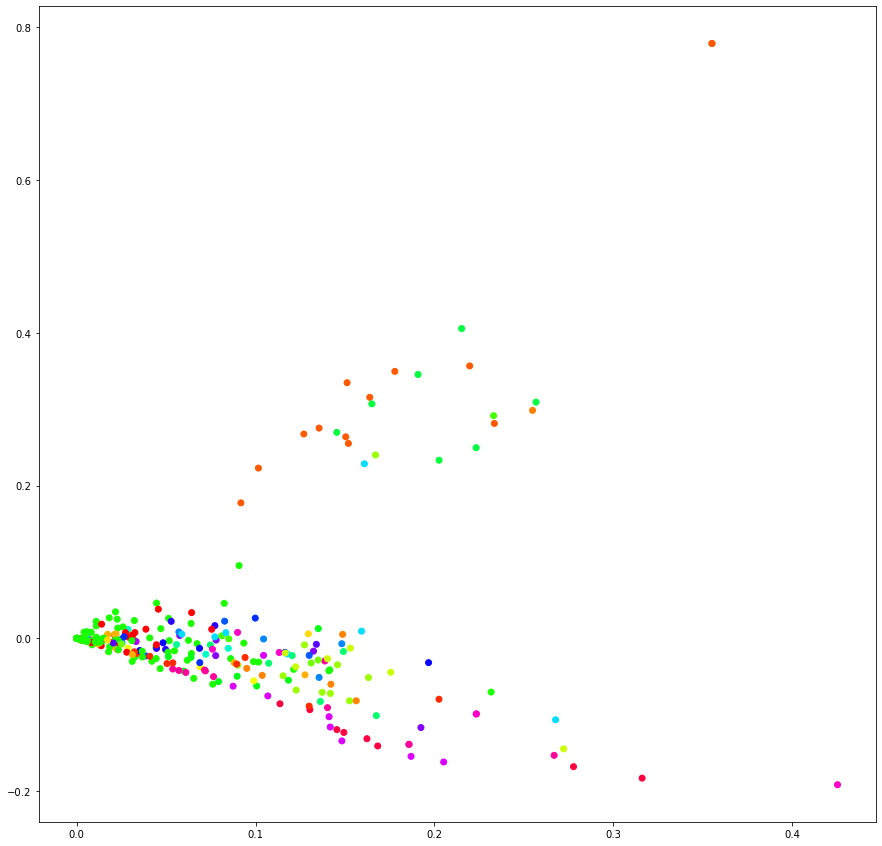

In [8]:
from sklearn.decomposition import TruncatedSVD

def plot_truncatedSVD(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)

    svd = TruncatedSVD(n_components=2).fit_transform(data[max_items,:].todense())
    
    idx = np.random.choice(range(svd.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    plt.scatter(svd[idx, 0], svd[idx, 1], c=label_subset)
    plt.show()

plot_truncatedSVD(words, clusters)


D:\Anaconda3\envs\Learning Store\lib\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Anaconda3\envs\Learning Store\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\Anaconda3\envs\Learning Store\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


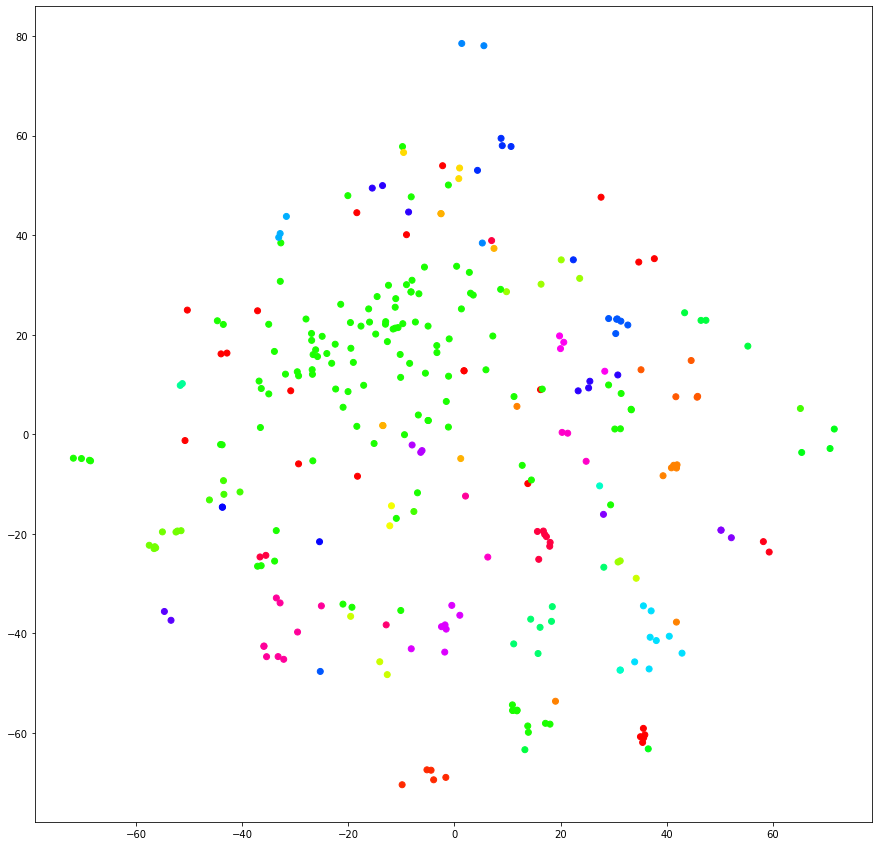

In [9]:
def plot_tsne_truncatedSVD(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)

    tsne = TSNE().fit_transform(TruncatedSVD(n_components=50).fit_transform(data[max_items,:].todense()))
    
    idx = np.random.choice(range(tsne.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    
    plt.scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    plt.show()

plot_tsne_truncatedSVD(words, clusters)


D:\Anaconda3\envs\Learning Store\lib\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Anaconda3\envs\Learning Store\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\Anaconda3\envs\Learning Store\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


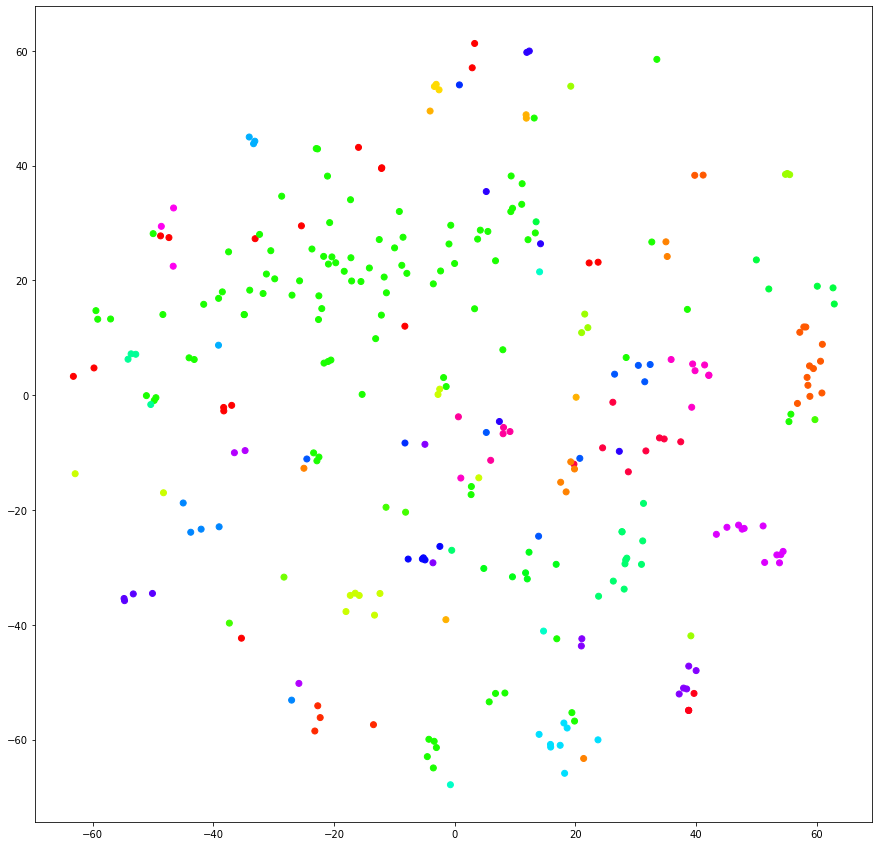

In [10]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)

    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))

    idx = np.random.choice(range(tsne.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    
    plt.scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    plt.show()
    
plot_tsne_pca(words, clusters)

D:\Anaconda3\envs\Learning Store\lib\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Anaconda3\envs\Learning Store\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\Anaconda3\envs\Learning Store\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


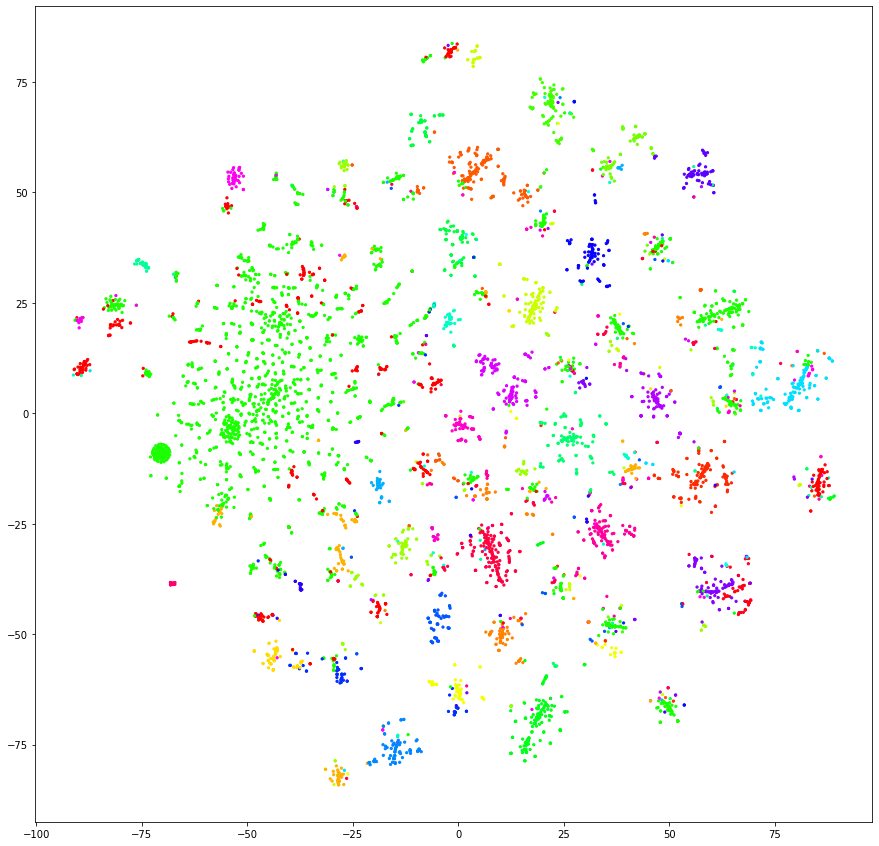

<Figure size 1440x1440 with 0 Axes>

In [11]:
def plot_dimensionality_reduction(data, labels):

    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data.todense()))

    colors = [cm.hsv(elem/max(labels)) for elem in labels]

    plt.scatter(tsne[:, 0], tsne[:, 1], c=colors, s=5)
    plt.figure(figsize=(20, 20))
    plt.show()


plot_dimensionality_reduction(words, clusters)

D:\Anaconda3\envs\Learning Store\lib\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Anaconda3\envs\Learning Store\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\Anaconda3\envs\Learning Store\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


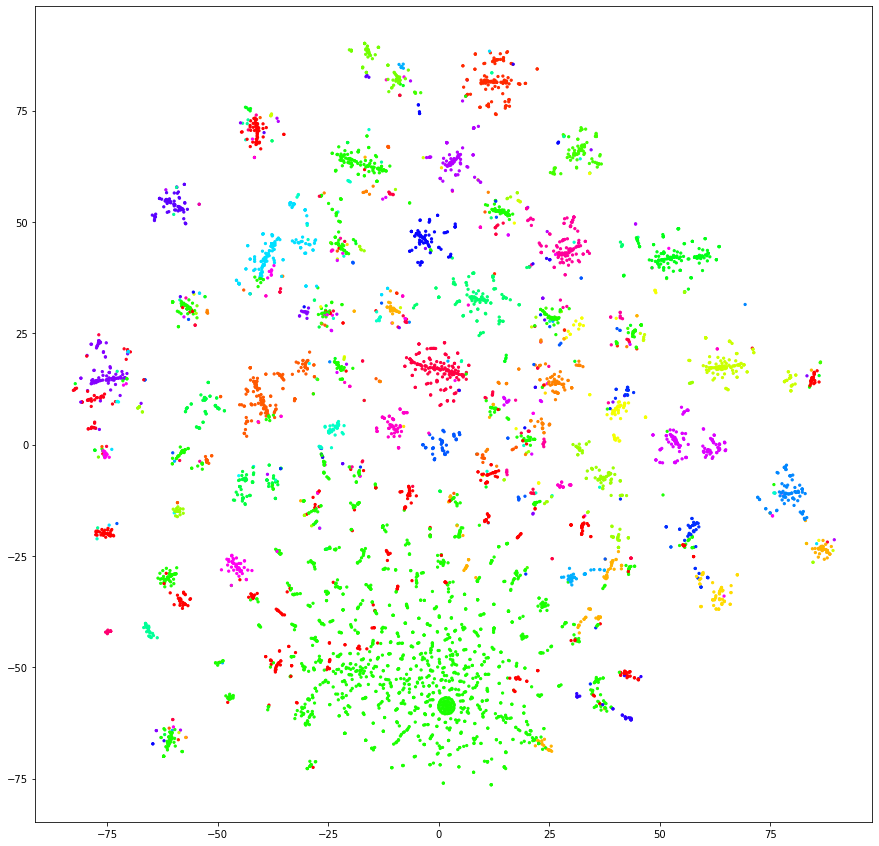

<Figure size 1440x1440 with 0 Axes>

In [12]:
def plot_dimensionality_reduction_truncated(data, labels):

    tsne = TSNE().fit_transform(TruncatedSVD(n_components=50).fit_transform(data.todense()))

    colors = [cm.hsv(elem/max(labels)) for elem in labels]

    temp = plt.scatter(tsne[:, 0], tsne[:, 1], c=colors, s=5)
    plt.figure(figsize=(20, 20))
    plt.show()
    return temp, colors


coords, colors = plot_dimensionality_reduction_truncated(words, clusters)


In [13]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(words, clusters, vectorizer.get_feature_names(), 10)


Cluster 0
wavence,leader,change,installation,design,communication,architecture,skills,ncss,business

Cluster 1
nuggets,training,management,enterprise,certification,level,virtual,2020,conference,sales

Cluster 2
edennet,specific_,architecture,specific_common,foundation,common,software,delivery,architect,kmcd

Cluster 3
purple,introduction,archive,computing,belt,packet,nokia,telco,core,cloud

Cluster 4
dimensioning,registers,cfx5000,traffica,wireless,session,deep,dive,planning,level

Cluster 5
diagnostics,openstack,troubleshooting,provisioning,system,cms8200,cfx5000,operation,installation,administration

Cluster 6
assurance,analyzer,provisioning,master,device,security,cognitive,network,digital,operations

Cluster 7
device,quality,engineer,portfolio,time,performance,nokia,risk,change,management

Cluster 8
radio,kmcd,optimization,test,services,integration,systems,professional,specialist,network

Cluster 9
program,financial,execution,managers,agile,customer,online,itpol,management,project


D:\Anaconda3\envs\Learning Store\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [14]:
input_title = "Developing with Python"
input_vector = vectorizer.transform([input_title])

In [15]:
recommendations = cosine_similarity(input_vector, words)

In [16]:
recs = pd.DataFrame(columns=['Title', 'Amount'])

for idx, elem in enumerate(recommendations[0]):
    if elem > 0.3:
        recs = recs.append({'Title': df.Title[idx], 'Amount': elem}, ignore_index=True)

recs = recs.sort_values(by='Amount', ascending=False)
recs.head()

,Title,Amount
0,Developing with Python,1.000000
6,Data Visualization with Python,0.545587
4,Python Training,0.509227
20,Advanced Python Topics Migrating from Python P...,0.486935
5,Python Basics,0.442095


In [18]:
plot_objects = pd.DataFrame(columns=["id", "x-coord", "y-coord", "cluster"])

plot_objects["id"] = df.ID
plot_objects['title'] = df.Title
plot_objects["x-coord"] = coords.get_offsets().data[:,0]
plot_objects["y-coord"] = coords.get_offsets().data[:,1]
plot_objects["cluster"] = clusters
plot_objects["colors"] = colors

plot_objects.to_csv("plot_objects.csv")

